# Bike Sharing Demand Prediction using Simple Linear Regression

Task 1: Predict bike rental demand using **temperature (`temp`)** as the only predictor.


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Load Dataset

In [4]:
DATA_PATH = "../bike-sharing-dataset/hour.csv"

if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"Dataset not found at {DATA_PATH}")

df = pd.read_csv(DATA_PATH)
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Feature and Target Selection

In [5]:
X = df[['temp']].values
y = df['cnt'].values

print("Feature shape:", X.shape)
print("Target shape:", y.shape)

Feature shape: (17379, 1)
Target shape: (17379,)


## Scatter Plot: Temperature vs Bike Rentals

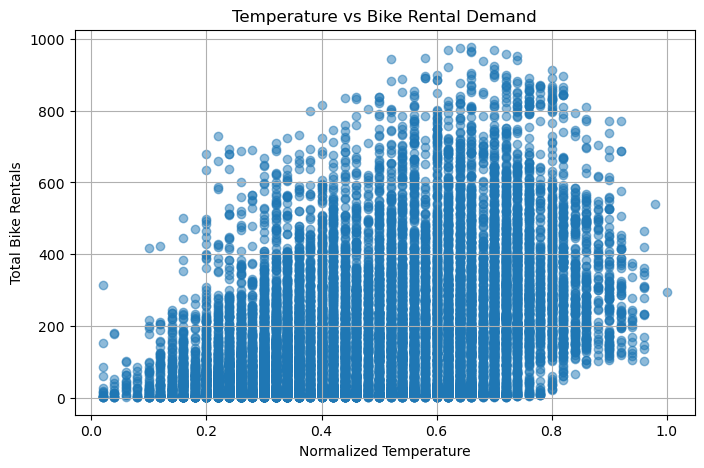

In [6]:
plt.figure(figsize=(8, 5))
plt.scatter(X, y, alpha=0.5)
plt.xlabel("Normalized Temperature")
plt.ylabel("Total Bike Rentals")
plt.title("Temperature vs Bike Rental Demand")
plt.grid(True)
plt.show()

## Train Simple Linear Regression Model

In [7]:
model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Slope (temp coefficient):", model.coef_[0])


Intercept: -0.03559611263943907
Slope (temp coefficient): 381.29492225916925


## Regression Line Visualization

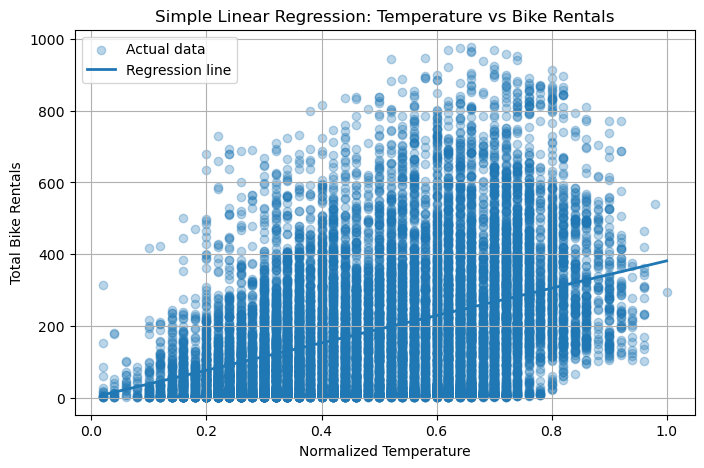

In [8]:
y_pred = model.predict(X)

sorted_idx = np.argsort(X.flatten())
X_sorted = X[sorted_idx]
y_pred_sorted = y_pred[sorted_idx]

plt.figure(figsize=(8, 5))
plt.scatter(X, y, alpha=0.3, label="Actual data")
plt.plot(X_sorted, y_pred_sorted, linewidth=2, label="Regression line")
plt.xlabel("Normalized Temperature")
plt.ylabel("Total Bike Rentals")
plt.title("Simple Linear Regression: Temperature vs Bike Rentals")
plt.legend()
plt.grid(True)
plt.show()

## Model Evaluation

In [10]:
r2 = r2_score(y, y_pred)
print(f"R-squared value Linear Regression: {r2:.4f}")

R-squared value Linear Regression: 0.1638
